In [1]:
import numpy as np
import gnsspy as gp
from gnsspy.plot import skyplot
import matplotlib.pyplot as plt
from gnsspy.plot import bandplot
import pandas as pd
import matplotlib.dates as mdates

In [5]:
#pip install seaborn

In [2]:
#station = gp.read_obsFile("data/PI01025aB.25o")
nav = gp.read_navFile("C:/DESPLIEGUES_APP/X5R_DACEPPK1.nav")
!dir

Navigation file  C:/DESPLIEGUES_APP/X5R_DACEPPK1.nav  is read in 0.01 seconds.
 El volumen de la unidad C es OS
 El n�mero de serie del volumen es: FCEA-F789

 Directorio de c:\DESPLIEGUES_APP\project_obs

04/04/2025  14:45    <DIR>          .
08/04/2025  18:34    <DIR>          ..
02/04/2025  11:58               117 .gitignore
02/04/2025  17:03             5,214 calculations.py
13/08/2024  13:20         1,332,736 convbin.exe
02/04/2025  17:38    <DIR>          gnsspy
17/03/2025  15:15             1,117 LICENSE
17/03/2025  15:15                36 MANIFEST.in
08/04/2025  16:22            18,527 project.py
17/03/2025  15:15             4,114 README.md
03/04/2025  09:14               133 requirements.txt
08/04/2025  18:39           937,688 Rinex_Analysis.ipynb
17/03/2025  15:15             1,471 setup.py
02/04/2025  17:39    <DIR>          venv
              10 archivos      2,301,153 bytes
               4 dirs  83,167,129,600 bytes libres


In [3]:
station = gp.read_obsFile("C:/DESPLIEGUES_APP/X5R_E8B2PPK2.obs")
df = station.observation

# Exportar el dataframe de observables a un archivo csv

# gnss.to_csv("data/24022025xxx.csv")

C:/DESPLIEGUES_APP/X5R_E8B2PPK2.obs exist in working directory | Reading...
Observation file  C:/DESPLIEGUES_APP/X5R_E8B2PPK2.obs  is read in 4.50 seconds.


In [4]:
station.interval

0

In [5]:
print(f"DataFrame shape: {df.shape}")
print(f"Column names: {df.columns.tolist()}")

# Identify observable columns (likely numerical columns)
observable_columns = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
print(f"Observable columns: {observable_columns}")

# Understand the 'epoch' column
print(f"Epoch data type: {df['epoch'].dtype}")
print(f"Epoch range: {df['epoch'].min()} to {df['epoch'].max()}")

diferencia = df['epoch'].max() - df['epoch'].min()
# Extraer la cantidad total de segundos
segundos_totales = diferencia.total_seconds()

# Calcular horas y minutos
horas = int(segundos_totales // 3600)
minutos = int((segundos_totales % 3600) // 60)

print(f"The recording time aprox is:  {horas} horas y {minutos} minutos.")

# Explore the 'SYSTEM' column
print(f"Unique satellite systems: {df['SYSTEM'].unique().tolist()}")
print(f"System observation counts:\n{df['SYSTEM'].value_counts()}")

DataFrame shape: (185049, 29)
Column names: ['C1C', 'C1I', 'C1X', 'C2C', 'C2X', 'C7I', 'C7X', 'D1C', 'D1I', 'D1X', 'D2C', 'D2X', 'D7I', 'D7X', 'L1C', 'L1I', 'L1X', 'L2C', 'L2X', 'L7X', 'S1C', 'S1I', 'S1X', 'S2C', 'S2X', 'S7I', 'S7X', 'epoch', 'SYSTEM']
Observable columns: ['C1C', 'C1I', 'C1X', 'C2C', 'C2X', 'C7I', 'C7X', 'D1C', 'D1I', 'D1X', 'D2C', 'D2X', 'D7I', 'D7X', 'L1C', 'L1I', 'L1X', 'L2C', 'L2X', 'L7X', 'S1C', 'S1I', 'S1X', 'S2C', 'S2X', 'S7I', 'S7X']
Epoch data type: datetime64[ns]
Epoch range: 2025-03-13 14:01:24.201000 to 2025-03-13 14:18:41.600999
The recording time aprox is:  0 horas y 17 minutos.
Unique satellite systems: ['GPS', 'COMPASS', 'GLONASS', 'SBAS', 'GALILEO']
System observation counts:
SYSTEM
GPS        53468
GALILEO    46683
COMPASS    40347
GLONASS    34177
SBAS       10374
Name: count, dtype: int64


In [8]:
df["epoch"].unique()

<DatetimeArray>
['2025-03-13 14:01:24.201000', '2025-03-13 14:01:24.400999',
 '2025-03-13 14:01:24.600999', '2025-03-13 14:01:24.800999',
 '2025-03-13 14:01:25.001000', '2025-03-13 14:01:25.201000',
 '2025-03-13 14:01:25.400999', '2025-03-13 14:01:25.600999',
 '2025-03-13 14:01:25.800999', '2025-03-13 14:01:26.001000',
 ...
 '2025-03-13 14:18:39.801000', '2025-03-13 14:18:40.000999',
 '2025-03-13 14:18:40.201000', '2025-03-13 14:18:40.401000',
 '2025-03-13 14:18:40.600999', '2025-03-13 14:18:40.801000',
 '2025-03-13 14:18:41.000999', '2025-03-13 14:18:41.201000',
 '2025-03-13 14:18:41.401000', '2025-03-13 14:18:41.600999']
Length: 5187, dtype: datetime64[ns]

In [9]:
epochs = df["epoch"].unique() # Unique epochs: Arreglo que contiene todas las épocas
print(f": Número total de épocas: {len(df["epoch"].unique())}")

: Número total de épocas: 5187


In [10]:
time_diffs = np.diff(epochs).astype('timedelta64[ms]') / np.timedelta64(1, 's')

print(time_diffs)
print(len(time_diffs))

[0.199 0.2   0.2   ... 0.2   0.2   0.199]
5186


In [ ]:
threshold = 1  # Si un salto excede a su tasa de registro, consideramos pérdida de datos

   # Identificar dónde hay saltos grandes
missing_mask = time_diffs > threshold
if np.any(missing_mask):
  indices_saltos = np.where(missing_mask)[0]
  print(f"Se detectaron {len(indices_saltos)} saltos mayores de {threshold}s:")
  for idx in indices_saltos:
    t1 = epochs[idx]
    t2 = epochs[idx+1]
    delta = time_diffs[idx]
    print(f"  Salto entre {t1} y {t2}: {delta:.2f} segundos")
else:
    print("No se han detectado saltos mayores de 1 s en la dimensión temporal.")

No se han detectado saltos mayores de 1 s en la dimensión temporal.


In [12]:
from gnsspy.position.position import _observation_picker
observables = _observation_picker(station, system="G")
print(observables)
len(observables)

(['GPS', 'L1', 'L1C', 'C1C', 1575420000], ['GPS', 'L2', 'L2X', 'C2X', 1227600000])


2

In [13]:
observables[1]

['GPS', 'L2', 'L2X', 'C2X', 1227600000]

In [14]:
# Filtrar solo las observaciones del sistema GPS
df_gps = df[df["SYSTEM"] == "GPS"]
df_glonass = df[df["SYSTEM"] == "GLONASS"]
df_galileo = df[df["SYSTEM"] == "GALILEO"]
df_beidou = df[df["SYSTEM"] == "COMPASS"]
df_sbas = df[df["SYSTEM"] == "SBAS"]

In [15]:
df_gps = df_gps.reset_index()
df_glonass = df_glonass.reset_index()
df_galileo = df_galileo.reset_index()
df_beidou = df_beidou.reset_index()
df_sbas = df_sbas.reset_index()

In [16]:
# Selecciona solo las columnas deseadas
df_gps = df_gps[['Epoch','SV','C1C', 'L1C', 'D1C', 'S1C', 'C2X', 'L2X', 'D2X', 'S2X']]
df_glonass = df_glonass[['Epoch','SV','C1C', 'L1C', 'D1C', 'S1C', 'C2C', 'L2C', 'D2C', 'S2C']]
df_galileo = df_galileo[['Epoch','SV','C1X', 'L1X', 'D1X', 'S1X', 'C7X', 'L7X', 'D7X', 'S7X']]
df_beidou = df_beidou[['Epoch','SV','C1I', 'L1I', 'D1I', 'S1I', 'C7I', 'D7I', 'S7I']]    #'L7I'
df_sbas = df_sbas[['Epoch','SV','C1C', 'L1C', 'D1C', 'S1C']]

In [17]:
# Crear una nueva columna "FREQ" inicialmente llena de 0
df_gps['FREQ'] = 0

# Iterar sobre las filas del DataFrame
for index, row in df_gps.iterrows():
  if pd.notna(row['L1C']) and pd.isna(row['L2X']):
    df_gps.at[index, 'FREQ'] = 1
  elif pd.notna(row['L1C']) and pd.notna(row['L2X']):
    df_gps.at[index, 'FREQ'] = 2

# Mostrar las primeras filas del DataFrame con la nueva columna
df_gps.head(10)

#df_gps.to_csv("data/df_gps.csv")

,Epoch,SV,C1C,L1C,D1C,S1C,C2X,L2X,D2X,S2X,FREQ
0,2025-03-13 14:01:24,G01,2.155582e+07,1.132766e+08,1229.966,48.0,NaN,NaN,NaN,NaN,1
1,2025-03-13 14:01:24,G02,2.090499e+07,1.098565e+08,103.609,50.0,NaN,NaN,NaN,NaN,1
2,2025-03-13 14:01:24,G03,2.259529e+07,1.187391e+08,-672.793,45.0,2.259530e+07,9.252423e+07,-524.512,39.0,2
3,2025-03-13 14:01:24,G04,2.051984e+07,1.078325e+08,678.524,48.0,NaN,NaN,NaN,NaN,1
4,2025-03-13 14:01:24,G08,2.194105e+07,1.153010e+08,-3115.318,47.0,NaN,NaN,NaN,NaN,1
5,2025-03-13 14:01:24,G09,2.224212e+07,1.168831e+08,2240.441,44.0,2.224213e+07,9.107804e+07,1745.773,36.0,2
6,2025-03-13 14:01:24,G17,2.358219e+07,1.239253e+08,2631.127,42.0,2.358220e+07,9.656526e+07,2050.173,39.0,2
7,2025-03-13 14:01:24,G31,2.431749e+07,1.277893e+08,-616.339,41.0,2.431749e+07,9.957609e+07,-479.913,27.0,2
8,2025-03-13 14:01:24,G28,2.552292e+07,1.341239e+08,-1628.892,38.0,2.552294e+07,1.045120e+08,-1269.614,40.0,2
9,2025-03-13 14:01:24,G27,NaN,NaN,NaN,NaN,2.476721e+07,NaN,-2976.773,25.0,0


In [18]:
df_gps.to_csv("data/df_gps.csv")

In [19]:
df_gps["FREQ"].value_counts()

FREQ
2    28077
1    20842
0     4549
Name: count, dtype: int64

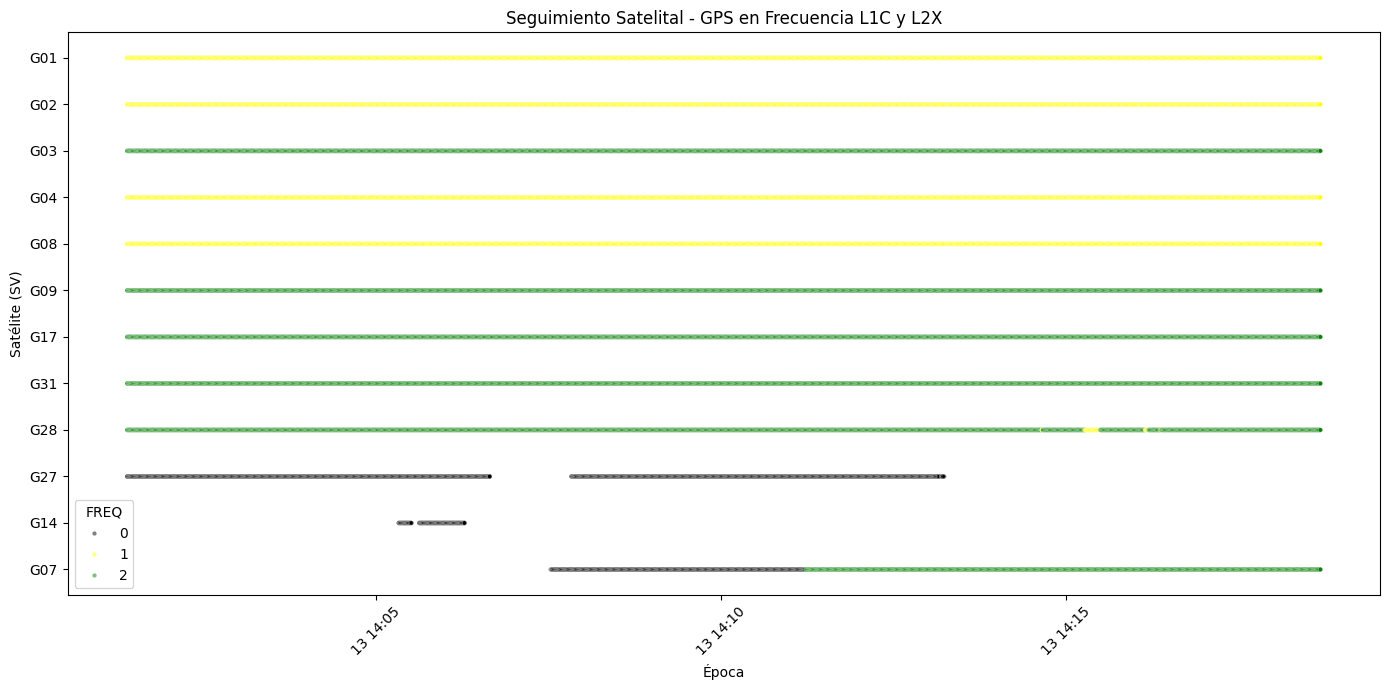

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

try:
  df_gps['Epoch'] = pd.to_datetime(df_gps['Epoch'])
except Exception as e:
  print("Error al convertir 'epoch' a datetime:", e)

# Crear un gráfico de dispersión:
plt.figure(figsize=(14, 7))

# Usar hue para colorear los puntos según el valor de la columna FREQ
sns.scatterplot(data=df_gps, x='Epoch', y='SV', hue='FREQ', palette={1: 'yellow', 2: 'green'}, s=10, alpha=0.5)

plt.title("Seguimiento Satelital - GPS en Frecuencia L1C y L2X")
plt.xlabel("Época")
plt.ylabel("Satélite (SV)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
# Crear una nueva columna "FREQ" inicialmente llena de 0
df_glonass['FREQ'] = 0

# Iterar sobre las filas del DataFrame
for index, row in df_glonass.iterrows():
  if pd.notna(row['L1C']) and pd.isna(row['L2C']):
    df_glonass.at[index, 'FREQ'] = 1
  elif pd.notna(row['L1C']) and pd.notna(row['L2C']):
    df_glonass.at[index, 'FREQ'] = 2

# Mostrar las primeras filas del DataFrame con la nueva columna
df_glonass.head(20)

,Epoch,SV,C1C,L1C,D1C,S1C,C2C,L2C,D2C,S2C,FREQ
0,2025-03-13 14:01:24,R06,2.103774e+07,1.122615e+08,436.377,38.0,NaN,NaN,NaN,NaN,1
1,2025-03-13 14:01:24,R18,2.417391e+07,1.290420e+08,-3677.459,35.0,2.417394e+07,1.003661e+08,-2859.991,29.0,2
2,2025-03-13 14:01:24,R05,2.133895e+07,1.140689e+08,-3204.956,50.0,2.133896e+07,8.872029e+07,-2492.798,45.0,2
3,2025-03-13 14:01:24,R20,2.057586e+07,1.100284e+08,2544.347,42.0,2.057586e+07,8.557766e+07,1979.164,44.0,2
4,2025-03-13 14:01:24,R19,2.102719e+07,1.124812e+08,-1840.845,38.0,2.102719e+07,8.748555e+07,-1431.824,42.0,2
5,2025-03-13 14:01:24,R07,2.402026e+07,NaN,2717.284,21.0,2.402024e+07,1.000084e+08,2115.118,27.0,0
6,2025-03-13 14:01:24,R21,2.434880e+07,1.302954e+08,3885.853,38.0,2.434881e+07,1.013409e+08,3021.949,37.0,2
7,2025-03-13 14:01:24,R06,2.103772e+07,1.122614e+08,436.700,38.0,NaN,NaN,NaN,NaN,1
8,2025-03-13 14:01:24,R18,2.417405e+07,1.290427e+08,-3676.928,35.0,2.417407e+07,1.003666e+08,-2859.808,29.0,2
9,2025-03-13 14:01:24,R05,2.133907e+07,1.140696e+08,-3205.053,50.0,2.133908e+07,8.872079e+07,-2492.808,42.0,2


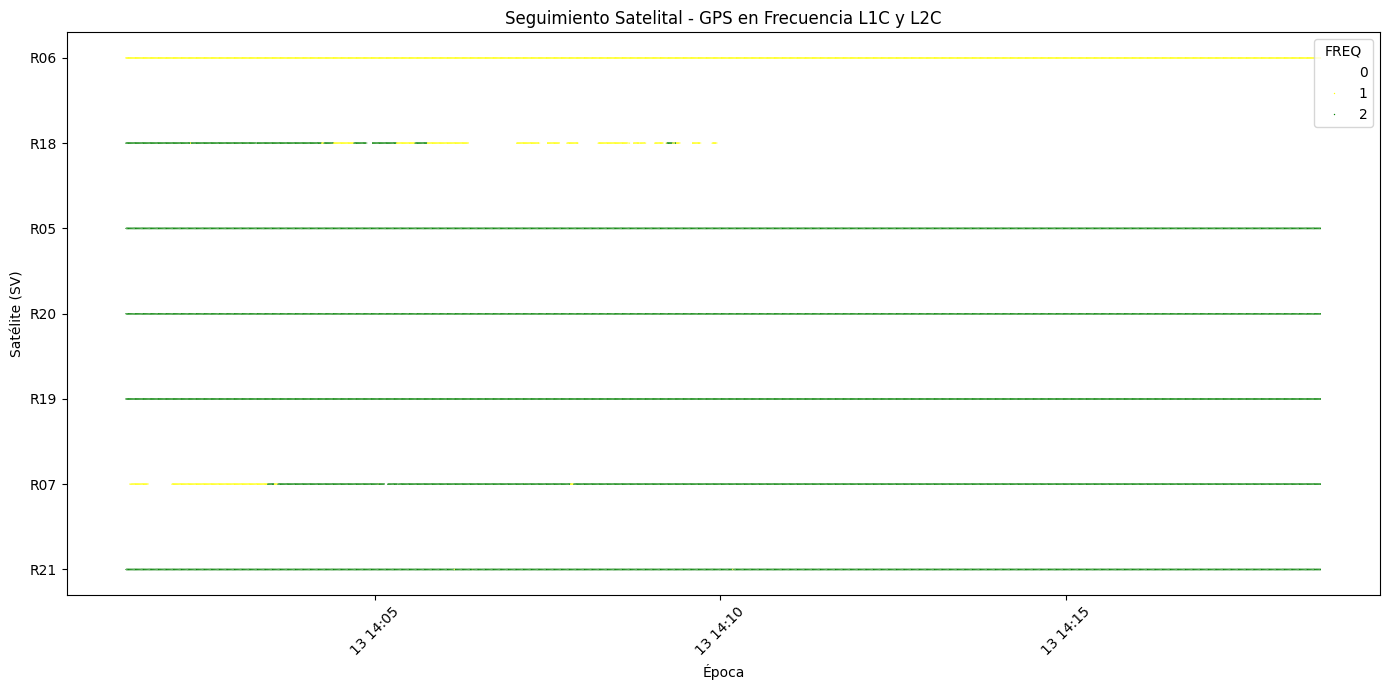

In [22]:
try:
  df_glonass['Epoch'] = pd.to_datetime(df_glonass['Epoch'])
except Exception as e:
  print("Error al convertir 'epoch' a datetime:", e)

# Crear un gráfico de dispersión:
plt.figure(figsize=(14, 7))

# Usar hue para colorear los puntos según el valor de la columna FREQ
sns.scatterplot(data=df_glonass, x='Epoch', y='SV', hue='FREQ', palette={1: 'yellow', 2: 'green'}, s=1)

plt.title("Seguimiento Satelital - GPS en Frecuencia L1C y L2C")
plt.xlabel("Época")
plt.ylabel("Satélite (SV)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

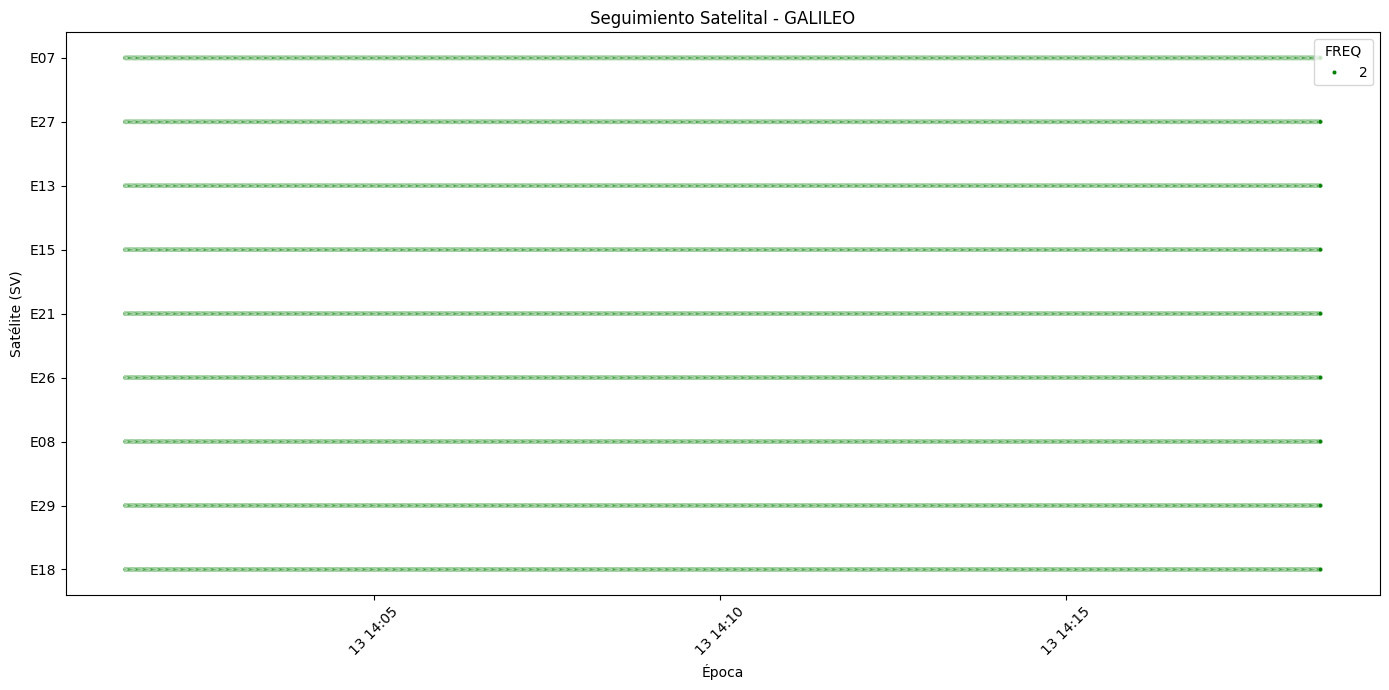

In [23]:
# Crear una nueva columna "FREQ" inicialmente llena de 0
df_galileo['FREQ'] = 0

# Iterar sobre las filas del DataFrame
for index, row in df_galileo.iterrows():
  if pd.notna(row['L1X']) and pd.isna(row['L7X']):
    df_galileo.at[index, 'FREQ'] = 1
  elif pd.notna(row['L1X']) and pd.notna(row['L7X']):
    df_galileo.at[index, 'FREQ'] = 2

try:
  df_galileo['Epoch'] = pd.to_datetime(df_galileo['Epoch'])
except Exception as e:
  print("Error al convertir 'epoch' a datetime:", e)

# Crear un gráfico de dispersión:
plt.figure(figsize=(14, 7))

# Usar hue para colorear los puntos según el valor de la columna FREQ
sns.scatterplot(data=df_galileo, x='Epoch', y='SV', hue='FREQ', palette={1: 'yellow', 2: 'green'}, s=10)

plt.title("Seguimiento Satelital - GALILEO")
plt.xlabel("Época")
plt.ylabel("Satélite (SV)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

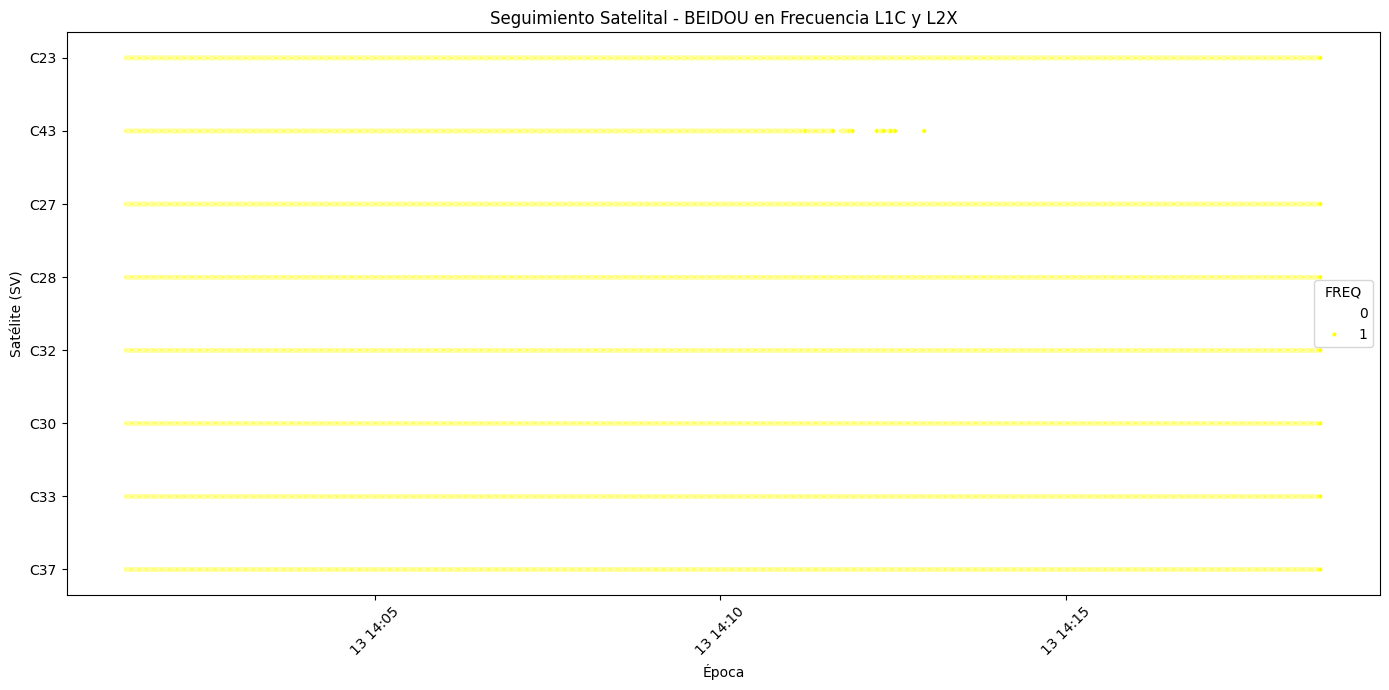

In [24]:
# Crear una nueva columna "FREQ" inicialmente llena de 0
df_beidou['FREQ'] = 0

# Iterar sobre las filas del DataFrame
for index, row in df_beidou.iterrows():
  if pd.notna(row['L1I']): # and pd.isna(row['L7I']):
    df_beidou.at[index, 'FREQ'] = 1
  #elif pd.notna(row['L1I']) and pd.notna(row['L7I']):
  #  df_beidou.at[index, 'FREQ'] = 2

try:
  df_beidou['Epoch'] = pd.to_datetime(df_beidou['Epoch'])
except Exception as e:
  print("Error al convertir 'epoch' a datetime:", e)

# Crear un gráfico de dispersión:
plt.figure(figsize=(14, 7))

# Usar hue para colorear los puntos según el valor de la columna FREQ
sns.scatterplot(data=df_beidou, x='Epoch', y='SV', hue='FREQ', palette={1: 'yellow', 2: 'green'}, s=10)

plt.title("Seguimiento Satelital - BEIDOU en Frecuencia L1C y L2X")
plt.xlabel("Época")
plt.ylabel("Satélite (SV)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
from gnsspy.position.position import _observation_picker
observation_list = _observation_picker(station, system="G")
print(observation_list)


(['GPS', 'L1', 'L1C', 'C1C', 1575420000], ['GPS', 'L2', 'L2X', 'C2X', 1227600000])


In [26]:
observation_list[0][2]

'L1C'

In [27]:
print(observation_list[0][2])
print(observation_list[1][2])
print(observation_list[0][3])
print(observation_list[1][3])


L1C
L2X
C1C
C2X


SYSTEM
GALILEO    269051
GPS        260445
GLONASS    198966
COMPASS    168407
SBAS        47590
QZSS            1

In [28]:
df_drop = df.dropna(subset=[observation_list[0][2], observation_list[1][2], observation_list[0][3], observation_list[1][3]])
df_drop.head(5)

C1C  C1I  C1X  C2C           C2X  C7I  C7X  \
Epoch               SV                                                         
2025-03-13 14:01:24 G03  2.259529e+07  NaN  NaN  NaN  2.259530e+07  NaN  NaN   
                    G09  2.224212e+07  NaN  NaN  NaN  2.224213e+07  NaN  NaN   
                    G17  2.358219e+07  NaN  NaN  NaN  2.358220e+07  NaN  NaN   
                    G31  2.431749e+07  NaN  NaN  NaN  2.431749e+07  NaN  NaN   
                    G28  2.552292e+07  NaN  NaN  NaN  2.552294e+07  NaN  NaN   

                              D1C  D1I  D1X  ...  L7X   S1C  S1I  S1X  S2C  \
Epoch               SV                       ...                             
2025-03-13 14:01:24 G03  -672.793  NaN  NaN  ...  NaN  45.0  NaN  NaN  NaN   
                    G09  2240.441  NaN  NaN  ...  NaN  44.0  NaN  NaN  NaN   
                    G17  2631.127  NaN  NaN  ...  NaN  42.0  NaN  NaN  NaN   
                    G31  -616.339  NaN  NaN  ...  NaN  41.0  NaN  NaN  NaN   
                    G28 -1628.892  NaN  NaN  ...  NaN  38.0  NaN  NaN  NaN   

                          S2X  S7I  S7X               epoch  SYSTEM  
Epoch               SV                                               
2025-03-13 14:01:24 G03  39.0  NaN  NaN 2025-03-13 14:01:24     GPS  
                    G09  36.0  NaN  NaN 2025-03-13 14:01:24     GPS  
                    G17  39.0  NaN  NaN 2025-03-13 14:01:24     GPS  
                    G31  27.0  NaN  NaN 2025-03-13 14:01:24     GPS  
                    G28  40.0  NaN  NaN 2025-03-13 14:01:24     GPS  

[5 rows x 29 columns]

In [29]:
df_drop.columns

Index(['C1C', 'C1I', 'C1X', 'C2C', 'C2X', 'C7I', 'C7X', 'D1C', 'D1I', 'D1X',
       'D2C', 'D2X', 'D7I', 'D7X', 'L1C', 'L1I', 'L1X', 'L2C', 'L2X', 'L7X',
       'S1C', 'S1I', 'S1X', 'S2C', 'S2X', 'S7I', 'S7X', 'epoch', 'SYSTEM'],
      dtype='object')

In [30]:
df_new = df_drop[['L1C', 'L2X', 'C1C', 'C2X']]
df_new.head(5)
   

L1C           L2X           C1C  \
Epoch               SV                                              
2025-03-13 14:01:24 G03  1.187391e+08  9.252423e+07  2.259529e+07   
                    G09  1.168831e+08  9.107804e+07  2.224212e+07   
                    G17  1.239253e+08  9.656526e+07  2.358219e+07   
                    G31  1.277893e+08  9.957609e+07  2.431749e+07   
                    G28  1.341239e+08  1.045120e+08  2.552292e+07   

                                  C2X  
Epoch               SV                 
2025-03-13 14:01:24 G03  2.259530e+07  
                    G09  2.224213e+07  
                    G17  2.358220e+07  
                    G31  2.431749e+07  
                    G28  2.552294e+07

In [31]:
df_drop.shape

(28077, 29)

In [32]:
observation = station.observation.dropna(subset=[observation_list[0][2], observation_list[1][2], observation_list[0][3], observation_list[1][3]])
observation = observation.loc[observation.SYSTEM == _SYSTEM_NAME[system]].copy(deep=True)

NameError: name '_SYSTEM_NAME' is not defined

In [ ]:
multipath_data = gp.multipath(station, system="G")

In [ ]:
multipath_data.shape

(198427, 32)

In [ ]:
multipath_data = gp.multipath(station, system="G")
multipath_data = multipath_data.dropna(axis=1, how='all')
multipath_data.reset_index(inplace=True)

#multipath.to_csv("data/24022025xxx_multipath.csv")

In [ ]:
multipath_data.head(10)

,SV,Epoch,C1C,C2X,D1C,D2X,L1C,L2X,S1C,S2X,epoch,SYSTEM,Multipath1,Multipath2
0,G03,2025-03-13 14:01:24,22595293.78700,22595303.29300,-672.79300,-524.51200,118739062.97900,92524230.23900,45.00000,39.00000,2025-03-13 14:01:24,GPS,-0.31138,-0.77975
1,G03,2025-03-13 14:01:24,22595319.36800,22595328.92300,-672.60400,-524.10500,118739197.58300,92524335.10600,45.00000,38.00000,2025-03-13 14:01:24,GPS,-0.35919,-0.78325
2,G03,2025-03-13 14:01:24,22595344.99400,22595354.56400,-673.24100,-524.68700,118739332.21300,92524440.01500,45.00000,38.00000,2025-03-13 14:01:24,GPS,-0.35053,-0.75899
3,G03,2025-03-13 14:01:24,22595370.63000,22595380.16400,-672.60700,-524.11100,118739466.81600,92524544.89200,45.00000,38.00000,2025-03-13 14:01:24,GPS,-0.33502,-0.78153
4,G03,2025-03-13 14:01:25,22595396.25900,22595405.78800,-673.93100,-525.18900,118739601.45600,92524649.80800,45.00000,38.00000,2025-03-13 14:01:25,GPS,-0.32586,-0.77696
5,G03,2025-03-13 14:01:25,22595421.94200,22595431.42100,-674.40500,-525.55500,118739736.04800,92524754.68100,45.00000,39.00000,2025-03-13 14:01:25,GPS,-0.25780,-0.75985
6,G03,2025-03-13 14:01:25,22595447.50400,22595456.98800,-672.03100,-523.68300,118739870.43300,92524859.40400,45.00000,39.00000,2025-03-13 14:01:25,GPS,-0.26282,-0.75805
7,G03,2025-03-13 14:01:25,22595473.08600,22595482.54000,-671.87000,-523.69700,118740004.87300,92524964.15000,45.00000,39.00000,2025-03-13 14:01:25,GPS,-0.27329,-0.80157
8,G03,2025-03-13 14:01:25,22595498.65300,22595508.13600,-672.85400,-524.38500,118740139.41600,92525069.00600,45.00000,39.00000,2025-03-13 14:01:25,GPS,-0.29591,-0.79096
9,G03,2025-03-13 14:01:26,22595524.27700,22595533.72600,-673.39100,-524.88300,118740273.98100,92525173.85400,45.00000,39.00000,2025-03-13 14:01:26,GPS,-0.28470,-0.81567


In [ ]:
multipath_data[multipath_data['SV'] == 'G28']
multipath_G28 = multipath_data[multipath_data['SV'] == 'G28']

<Axes: title={'center': 'Multipath G03 L2X'}, xlabel='epoch'>

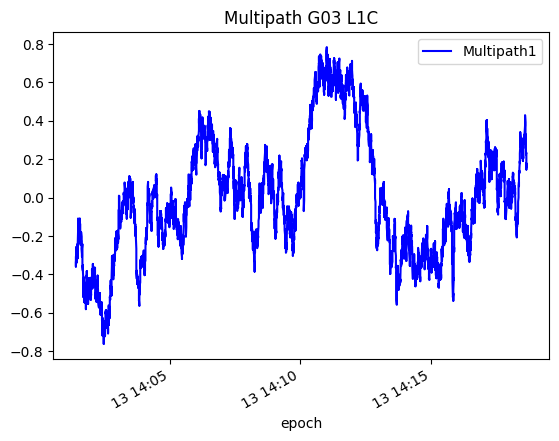

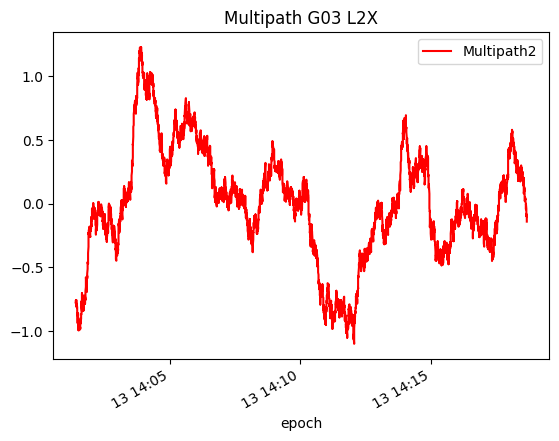

In [ ]:
multipath_data[multipath_data["SV"] == "G03"].plot(x="epoch", y="Multipath1", title="Multipath G03 L1C", color="blue")
multipath_data[multipath_data["SV"] == "G03"].plot(x="epoch", y="Multipath2", title="Multipath G03 L2X", color="red")

<Axes: title={'center': 'Multipath G03 L2X'}, xlabel='L1C'>

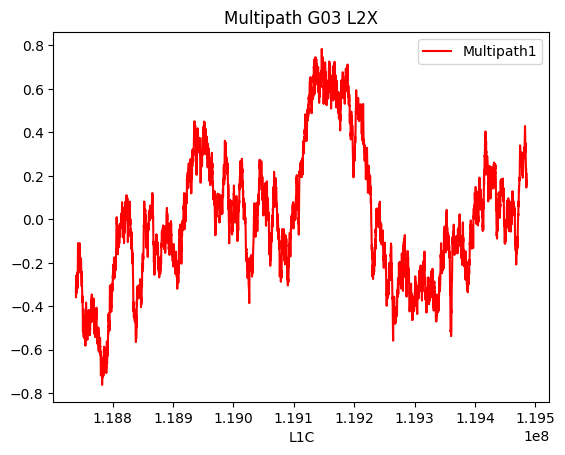

In [ ]:
multipath_data[multipath_data["SV"] == "G03"].plot(x="L1C", y="Multipath1", title="Multipath G03 L2X", color="red")

<Axes: title={'center': 'Multipath G28 L1C'}, xlabel='C1C'>

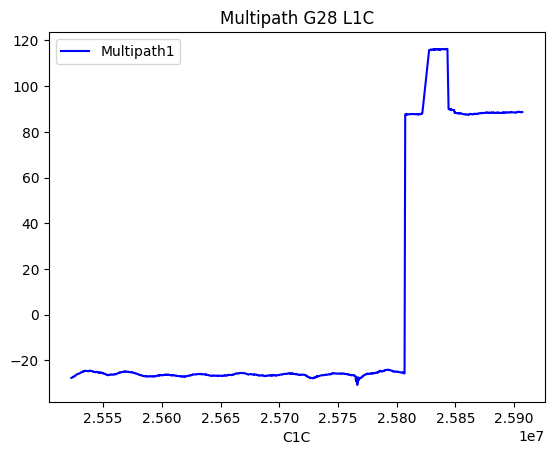

In [ ]:
#multipath_G28["Multipath1"].describe()
multipath_G28.plot(x="C1C", y="Multipath1", title="Multipath G28 L1C", color="blue")

In [ ]:
pd.options.display.float_format = '{:.5f}'.format

print(multipath_data["Multipath1"].describe())

count   28077.00000
mean        0.00000
std        21.12372
min       -30.80616
25%        -0.48617
50%        -0.07779
75%         0.33007
max       116.29682
Name: Multipath1, dtype: float64


In [ ]:
num_registros = multipath_data["Multipath1"].between(-0.75, 0.75).sum()
print("Número de registros entre -0.30 y 0.30:", num_registros)

Número de registros entre -0.30 y 0.30: 85078


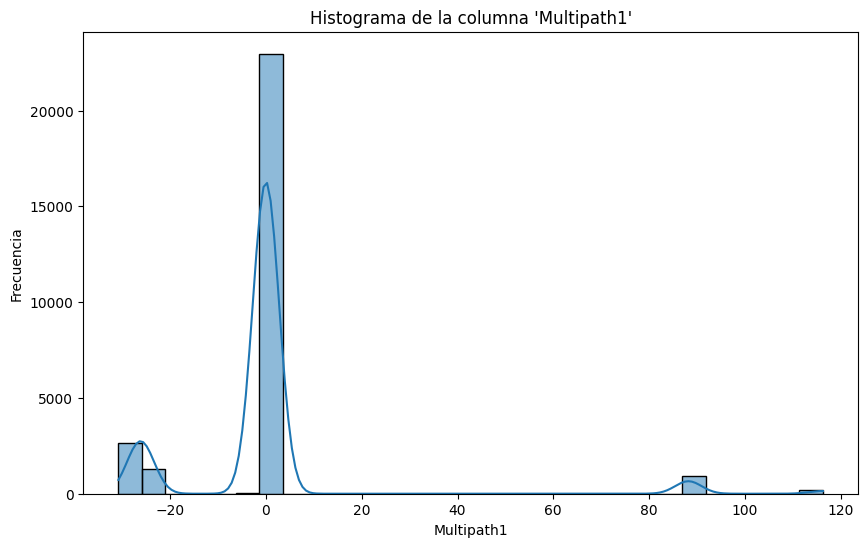

In [ ]:
# Visualización: Histograma y distribución (solo si la columna es numérica)

columna = 'Multipath1' 

plt.figure(figsize=(10, 6))
sns.histplot(multipath_data["Multipath1"], kde=True, bins=30)
plt.title(f"Histograma de la columna '{columna}'")
plt.xlabel(columna)
plt.ylabel("Frecuencia")
plt.show()

<Axes: >

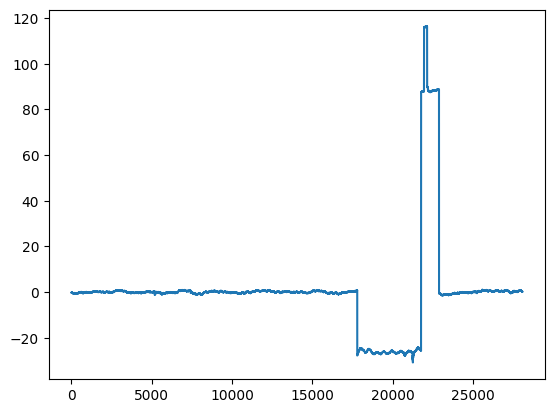

In [ ]:
multipath_data.Multipath1.plot()

In [ ]:
multipath_data[multipath_data.Multipath1 < -1.5].shape

(76341, 14)

In [ ]:
# Graficos
satellites = multipath_data["SV"].unique()
for sv in satellites:
    sv_data = multipath_data[multipath_data["SV"] == sv]
    rms_L1 = np.sqrt(np.nanmean(sv_data["Multipath1"] ** 2))
    rms_L2 = np.sqrt(np.nanmean(sv_data["Multipath2"] ** 2))

    fig, ax = plt.subplots(figsize=(12, 5))
    ax.plot(sv_data["Epoch"], sv_data["Multipath1"], label=f"{sv} - L1", linestyle="-", color="blue")
    ax.plot(sv_data["Epoch"], sv_data["Multipath2"], label=f"{sv} - L2", linestyle="dashed", color="red")

    ax.set_xlabel("Tiempo (Epoch)")
    ax.set_ylabel("Multipath (m)")
    ax.set_title(f"Multipath L1 y L2 para {sv} (Galileo)")
    ax.legend()
    ax.set_ylim(-5, 5)
    ax.grid()

    ax.text(0.02, 0.90, f"RMS L1: {rms_L1:.3f} m\nRMS L2: {rms_L2:.3f} m",
            transform=ax.transAxes, fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.6))

    plt.savefig(f"multipath_{sv}.png", dpi=300, bbox_inches="tight")
    plt.close(fig)

In [ ]:
# almacenando en un dataframe "gnss"
#gnss = station.observation

#gnss.to_csv("data/gnss.csv", index=False)

#print(gnss.head(10))

                                   C1C            C1I            C1X  C2C  \
Epoch               SV                                                      
2025-03-25 12:50:38 S31 40573289.46200            NaN            NaN  NaN   
                    S33 41628999.79700            NaN            NaN  NaN   
                    E11            NaN            NaN 30441461.88700  NaN   
                    G02 23653973.13200            NaN            NaN  NaN   
                    G09 25522021.64600            NaN            NaN  NaN   
                    C30            NaN 25366537.74100            NaN  NaN   
                    C22            NaN 28788370.30700            NaN  NaN   
                    C29            NaN 24841638.46300            NaN  NaN   
                    C19            NaN 25847008.30700            NaN  NaN   
                    C32            NaN 30080440.05400            NaN  NaN   

                                   C2X  C7I            C7X        D1C  \
Ep

In [ ]:
SVList = gnss.index.get_level_values('SV').unique()
print(SVList)

print(gnss.epoch.dt.time)
print(gnss.epoch.unique())

Index(['S31', 'S33', 'E11', 'G02', 'G09', 'C30', 'C22', 'C29', 'C19', 'C32',
       'C20', 'R02', 'R24', 'R22', 'R03', 'R08', 'G27', 'G03', 'E04', 'E19',
       'E09', 'C36', 'R23', 'R01', 'E12', 'G01', 'E06', 'G28', 'E16', 'G08',
       'E24', 'G17', 'G31', 'E31', 'E10', 'E33', 'G04', 'J04', 'G14', 'C35',
       'C46', 'R17', 'G07', 'G19', 'R12', 'R11', 'R13', 'E36', 'E05', 'G06',
       'G30', 'R18', 'R04', 'C44', 'R14', 'C45', 'G11', 'E23', 'R19', 'G22',
       'G20', 'R15', 'E34', 'C26', 'G13', 'E25', 'C12', 'G05', 'R16', 'R05'],
      dtype='object', name='SV')
Epoch                SV 
2025-03-25 12:50:38  S31    12:50:38
                     S33    12:50:38
                     E11    12:50:38
                     G02    12:50:38
                     G09    12:50:38
                              ...   
2025-03-25 19:27:11  G30    19:27:11
                     G13    19:27:11
                     G19    19:27:11
                     G14    19:27:11
                     G05    19:2

In [ ]:
# Epoch of RINEX file as datetime
print(station.epoch)
# Approximate position [type:list-> x,y,z]
print(station.approx_position)
# Antenna Type
print(station.antenna_type)
# Observation interval(seconds)
print(station.interval)
# Receiver clock error
# (if available)
print(station.receiver_clock)
# Receiver Type
print(station.receiver_type)
# RINEX version
print(station.version)
# RINEX filename
print(station.filename)

2025-03-25
[1402853.5585, -6077628.6276, -1328711.1554]
['METX5', 'A']
1
0
['PEX5-23367', 'METTATEC', 'X5R', '7.3.0', 'R']
3.02
data/cors2_1.obs


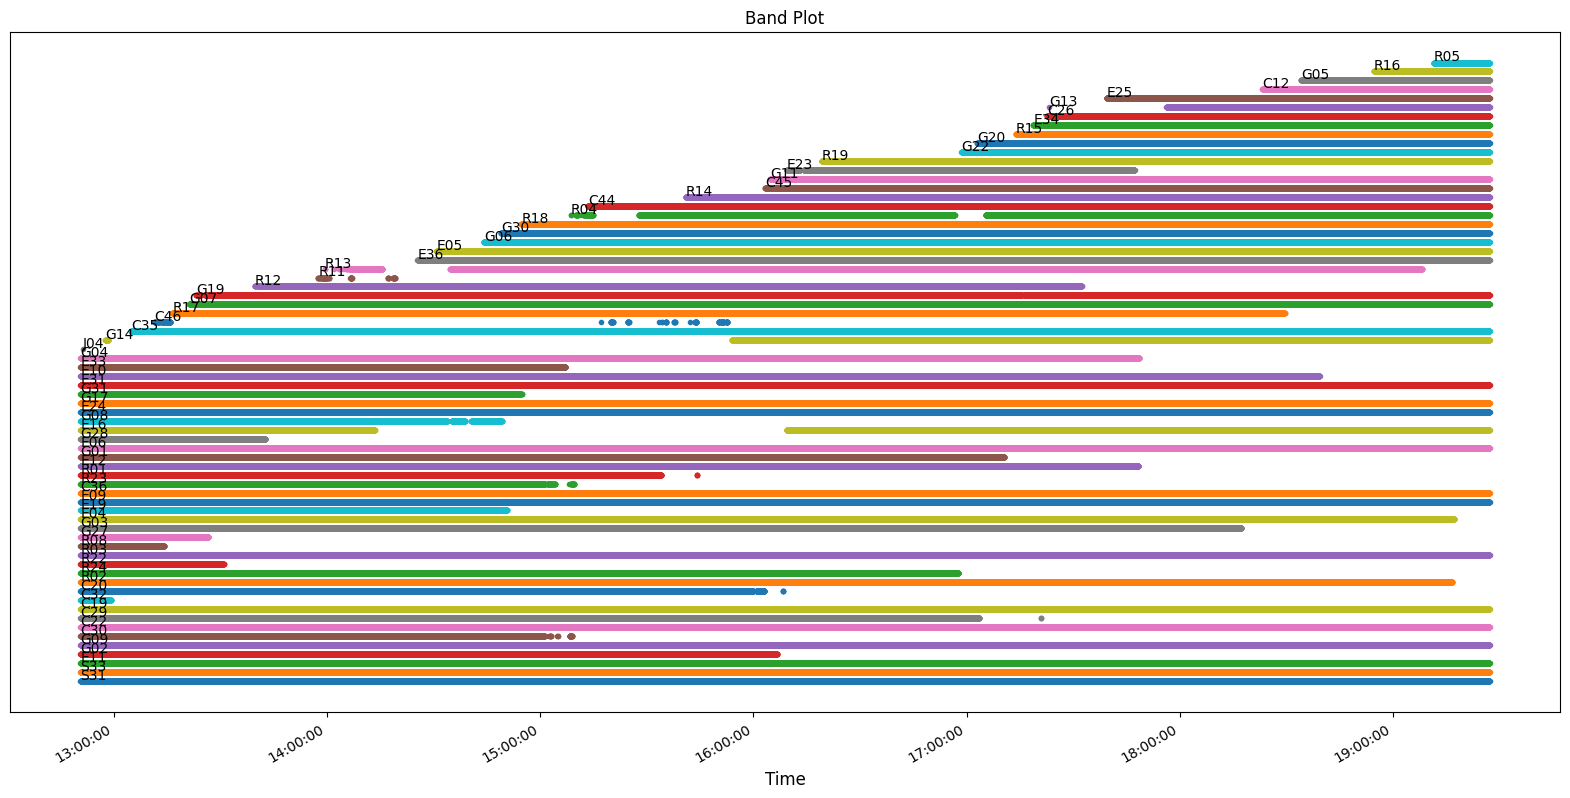

In [ ]:
# Modificar la función bandplot para convertir el tiempo a segundos
def bandplot_datetime(station, system='G', SVlist=None):
    # Extraer el DataFrame de observaciones
    gnss = station.observation
    
    # Lista de satélites disponibles en las observaciones
    SVList = gnss.index.get_level_values('SV').unique()
    
    # Validar la lista de satélites si se pasa manualmente
    if SVlist is None:
        SVlist = SVList
    else:
        for sv in SVlist:
            if sv[0] not in {'G','R','C','E'} or not sv[1:].isdigit() or len(sv) != 3:
                raise Warning('''Invalid format: 
                    Exp. SVlist= ['G01', 'G02', 'G11',....] 
                    Program Stopped''')
            elif sv not in SVList:
                SVlist.remove(sv)
                print('{} satellite not in SP3 file'.format(sv))
    
    if len(SVlist) == 0:
        raise Warning('''Satellite(s) that you have entered not in SP3 file
            Program Stopped''')
    
    # Crear una columna "Visibility" ficticia para separar a los satélites en el eje Y
    RefPos = []
    line = 0.0  # Puedes ajustarlo si quieres más espacio
    step = 0.05 # Distancia vertical entre satélites
    for i in range(len(SVList)):
        RefPos.append(line + (i * step))
    RefPos = pd.DataFrame(data=RefPos, index=SVList, columns=['Visibility'])
    
    # Unir esa columna al DataFrame
    gnss = gnss.join(RefPos, how='inner')
    gnss = gnss.reorder_levels(['SV','Epoch'])
    gnss = gnss.sort_index()
    
    # Asegurar que 'epoch' sea de tipo datetime64
    if not pd.api.types.is_datetime64_any_dtype(gnss.epoch):
        gnss['epoch'] = pd.to_datetime(gnss.epoch)

    # Crear la figura y eje
    fig, ax = plt.subplots(figsize=(20,10))
    ax.set_title("Band Plot", fontsize=12)
    ax.set_xlabel('Time', fontsize=12)
    ax.get_yaxis().set_visible(False)

    # Formatear el eje X como fechas/horas
    # AutoDateLocator elige automáticamente las marcas del eje,
    # DateFormatter define el formato en que se mostrará.
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
    
    for sv in SVlist:
        # Datos de un satélite
        sv_data = gnss.loc[sv]
        
        # Graficar usando la columna 'epoch' en el eje X
        ax.plot(sv_data.epoch, sv_data.Visibility, linestyle='', marker='.', linewidth=1)
        
        # Anotar el nombre del satélite al inicio de su traza
        ax.annotate(sv, xy=(sv_data.epoch.iloc[0], sv_data.Visibility.iloc[0] + 0.01), 
                    size='medium', color='black')
    
    fig.autofmt_xdate()  # Para rotar etiquetas de fechas si es necesario
    plt.savefig(station.filename + "_BandPlot.png", transparent=True)
    plt.show()

# Ejecutar el bandplot ajustado
bandplot_datetime(station, system='G')
plt.show()

In [ ]:
# Ruta al archivo RINEX de observaciones
file_path = "E:/temp/PI01025aB.25o"

In [ ]:
print(f"Conteo de registros: {count}")
print(f"Primer registro: {lines[0]}")
print(f"Último registro: {lines[-1]}")

Conteo de registros: 1


IndexError: list index out of range

In [ ]:
lines = []

flag = False
counters = []
count_S = count_G = count_R = count_E = count_C = 0
satellites = set([])

with open(file_path, 'r') as file:
  for line in file:
    if '>' in line:
      #print(line)
      lines.append(line)
      flag = True
      counters.append([count_S, count_G, count_R, count_E, count_C])
      count_S = count_G = count_R = count_E = count_C = 0
    if flag:
      if 'S' in line:
        count_S += 1
      elif 'G' in line:
        count_G += 1
      elif 'R' in line:
        count_R += 1
      elif 'E' in line:
        count_E += 1
      elif 'C' in line:
        count_C += 1
      satellites.add(line[0:3])
      #print(satellites)

In [ ]:
#print(f"Promedio: {sum(temp)/len(temp)}")

if count_S + count_G + count_R + count_E + count_C != 0:
  counters.append([count_S, count_G, count_R, count_E, count_C])
counters.remove([0,0,0,0,0])


data = {
    'Epochs': [i[1:30] for i in lines],
    'S': [j[0] for j in counters],
    'G': [j[1] for j in counters],
    'R': [j[2] for j in counters],
    'E': [j[3] for j in counters],
    'C': [j[4] for j in counters]
}
df = pd.DataFrame(data)
df

ValueError: All arrays must be of the same length

In [ ]:
df['Epochs'] = pd.to_datetime(df['Epochs'].str.strip(), format='%Y %m %d %H %M %S.%f')

NameError: name 'df' is not defined

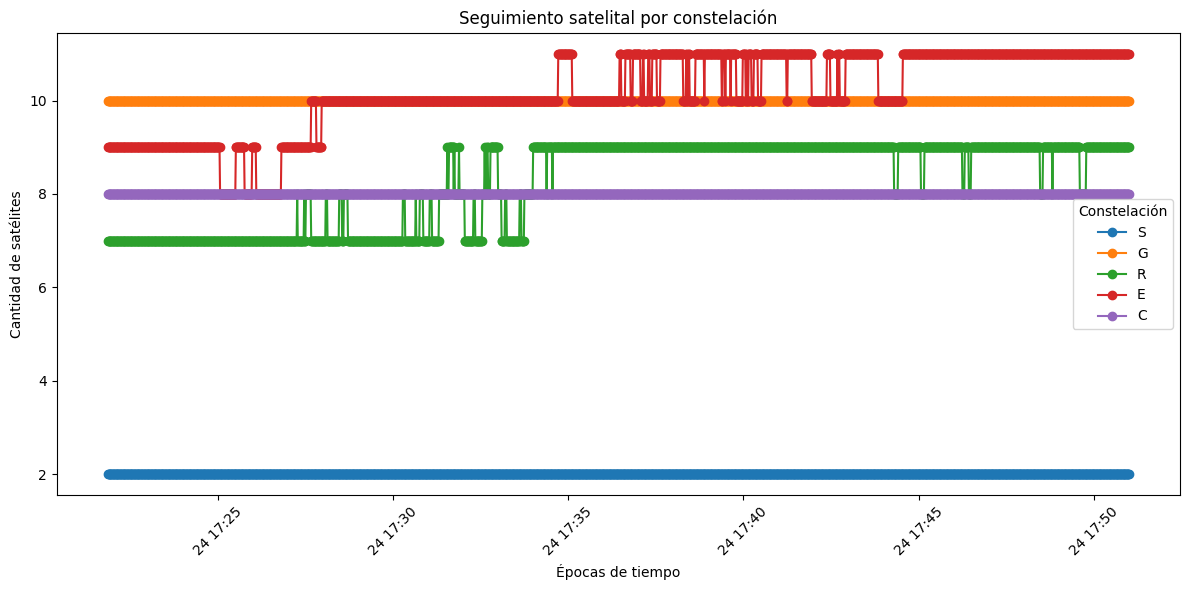

In [ ]:
# Crear la figura y graficar cada constelación
plt.figure(figsize=(12, 6))
plt.plot(df['Epochs'], df['S'], marker='o', label='S')
plt.plot(df['Epochs'], df['G'], marker='o', label='G')
plt.plot(df['Epochs'], df['R'], marker='o', label='R')
plt.plot(df['Epochs'], df['E'], marker='o', label='E')
plt.plot(df['Epochs'], df['C'], marker='o', label='C')

# Configurar etiquetas y título
plt.xlabel('Épocas de tiempo')
plt.ylabel('Cantidad de satélites')
plt.title('Seguimiento satelital por constelación')
plt.legend(title='Constelación')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
from datetime import datetime

times = []

for line in lines:
    partes = line.split()  # Separar los elementos de la línea
    #print(partes[1])
    fecha_str = " ".join(partes[1:7])  # Extraer la parte de la fecha y hora
    fecha_str = fecha_str.rstrip("0")  # eliminar ceros innecesarios al final
    times.append(datetime.strptime(fecha_str, "%Y %m %d %H %M %S.%f"))  # Convertir a objeto datetime

In [ ]:
time_diffs = np.diff(times).astype('timedelta64[ms]') / np.timedelta64(1, 's')

print(time_diffs)
print(len(time_diffs))

[1. 1. 1. ... 1. 1. 1.]
1748


In [ ]:
threshold = 1  # Si un salto excede a su tasa de registro, consideramos pérdida de datos

   # Identificar dónde hay saltos grandes
missing_mask = time_diffs > threshold
if np.any(missing_mask):
  indices_saltos = np.where(missing_mask)[0]
  print(f"Se detectaron {len(indices_saltos)} saltos mayores de {threshold}s:")
  for idx in indices_saltos:
    t1 = times[idx]
    t2 = times[idx+1]
    delta = time_diffs[idx]
    print(f"  Salto entre {t1} y {t2}: {delta:.2f} segundos")
else:
    print("No se han detectado saltos mayores de 1 s en la dimensión temporal.")

No se han detectado saltos mayores de 1 s en la dimensión temporal.


**Librería GNSSpy**

In [ ]:
#!pip install gnsspy

ERROR: Could not find a version that satisfies the requirement gnsspy (from versions: none)
ERROR: No matching distribution found for gnsspy


In [ ]:
!git clone https://github.com/GNSSpy-Project/gnsspy.git

Cloning into 'gnsspy'...
remote: Enumerating objects: 97, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 97 (delta 0), reused 1 (delta 0), pack-reused 93 (from 1)
Receiving objects: 100% (97/97), 353.71 KiB | 14.74 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
%cd gnsspy

/content/gnsspy


In [ ]:
!python setup.py install

/usr/local/lib/python3.11/dist-packages/setuptools/dist.py:294: InformationOnly: Normalizing '2019.08.02' to '2019.8.2'
  self.metadata.version = self._normalize_version(self.metadata.version)
running install
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer or other
        standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()
/usr/local/lib/python3.11/dist-packages/setuptools/_distutils/cmd.py:66: EasyInstallDeprecationWarning: easy_install command is deprecated.
!!

        **********************************************************

In [ ]:
# Clonar y "setup.py install" de gnsspy:
!git clone https://github.com/GNSSpy-Project/gnsspy.git
%cd gnsspy
!python setup.py install

# Instalar dependencias faltantes:
!pip install pyunpack patool

# Probar import
import gnsspy

fatal: destination path 'gnsspy' already exists and is not an empty directory.
/content/gnsspy/gnsspy
python3: can't open file '/content/gnsspy/gnsspy/setup.py': [Errno 2] No such file or directory
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/gnsspy-2019.8.2-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /usr/local/lib/python3.11/dist-packages/patool-4.0.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from gnsspy import read_rinex # Import read_rinex from gnsspy.rinex instead of gnsspy.io

ImportError: cannot import name 'read_rinex' from 'gnsspy' (unknown location)

In [ ]:
# 1) Cargar el archivo de observación RINEX.
#    Ajusta el nombre/path a tu archivo real.
obs_data = read_rinex("miObsFile.21o")

In [ ]:
# 2) Identificar cuántas épocas totales existen.
#    GNSSpy almacena los datos en un DataFrame con índice múltiple: (epoch, sat).
unique_epochs = obs_data.index.get_level_values("epoch").unique()
total_epochs = len(unique_epochs)
print(f"Número total de épocas: {total_epochs}")

In [ ]:
# Ruta al archivo RINEX de observaciones (formato 2.x o 3.x)
rinex_file = "24022025.25O"

In [ ]:
# Cargar el dataset con georinex.load
ds = gr.load(rinex_file)

In [ ]:
ds

<xarray.Dataset> Size: 16MB
Dimensions:  (time: 1749, sv: 40)
Coordinates:
  * time     (time) datetime64[ns] 14kB 2025-02-24T17:21:51.988999 ... 2025-0...
  * sv       (sv) <U3 480B 'C12' 'C21' 'C22' 'C34' ... 'R20' 'R21' 'S31' 'S33'
Data variables: (12/28)
    C1C      (time, sv) float64 560kB nan nan nan ... 3.434e+07 3.539e+07
    L1C      (time, sv) float64 560kB nan nan nan ... 1.805e+08 1.86e+08
    D1C      (time, sv) float64 560kB nan nan nan ... 2.264e+03 -463.4 -464.0
    S1C      (time, sv) float64 560kB nan nan nan nan ... 42.0 50.0 46.0 44.0
    C2X      (time, sv) float64 560kB nan nan nan nan nan ... nan nan nan nan
    L2X      (time, sv) float64 560kB nan nan nan nan nan ... nan nan nan nan
    ...       ...
    D1I      (time, sv) float64 560kB 507.9 -339.0 -1.212e+03 ... nan nan nan
    S1I      (time, sv) float64 560kB 46.0 46.0 47.0 43.0 ... nan nan nan nan
    C7I      (time, sv) float64 560kB 1.966e+07 nan nan nan ... nan nan nan nan
    L7I      (time, sv) float64 560kB 7.915e+07 nan nan nan ... nan nan nan nan
    D7I      (time, sv) float64 560kB 392.6 nan nan nan nan ... nan nan nan nan
    S7I      (time, sv) float64 560kB 53.0 nan nan nan nan ... nan nan nan nan
Attributes:
    version:          3.02
    interval:         1.0
    rinextype:        obs
    fast_processing:  0
    time_system:      GPS
    filename:         24022025.25O
    position:         [1402853.6805, -6077623.847, -1328711.9998]

In [ ]:
print(ds.dims)
print(ds.data_vars)
print(ds.coords)

FrozenMappingWarningOnValuesAccess({'time': 1749, 'sv': 40})
Data variables:
    C1C      (time, sv) float64 560kB nan nan nan ... 3.434e+07 3.539e+07
    L1C      (time, sv) float64 560kB nan nan nan ... 1.805e+08 1.86e+08
    D1C      (time, sv) float64 560kB nan nan nan ... 2.264e+03 -463.4 -464.0
    S1C      (time, sv) float64 560kB nan nan nan nan ... 42.0 50.0 46.0 44.0
    C2X      (time, sv) float64 560kB nan nan nan nan nan ... nan nan nan nan
    L2X      (time, sv) float64 560kB nan nan nan nan nan ... nan nan nan nan
    D2X      (time, sv) float64 560kB nan nan nan nan nan ... nan nan nan nan
    S2X      (time, sv) float64 560kB nan nan nan nan nan ... nan nan nan nan
    C2C      (time, sv) float64 560kB nan nan nan nan ... 1.85e+07 nan nan
    L2C      (time, sv) float64 560kB nan nan nan nan ... 7.699e+07 nan nan
    D2C      (time, sv) float64 560kB nan nan nan nan ... 1.761e+03 nan nan
    S2C      (time, sv) float64 560kB nan nan nan nan nan ... 51.0 47.0 nan nan
 

In [ ]:
ds_sv = ds.sv.values
ds_sv

array(['C12', 'C21', 'C22', 'C34', 'C35', 'C36', 'C44', 'C45', 'E04',
       'E07', 'E12', 'E13', 'E19', 'E21', 'E23', 'E26', 'E27', 'E29',
       'E33', 'G01', 'G02', 'G03', 'G04', 'G06', 'G07', 'G09', 'G17',
       'G19', 'G30', 'R05', 'R06', 'R07', 'R09', 'R15', 'R16', 'R19',
       'R20', 'R21', 'S31', 'S33'], dtype='<U3')

In [ ]:
ds.time.values

array(['2025-02-24T17:21:51.988999000', '2025-02-24T17:21:52.988999000',
       '2025-02-24T17:21:53.988999000', ...,
       '2025-02-24T17:50:57.988999000', '2025-02-24T17:50:58.988999000',
       '2025-02-24T17:50:59.988999000'], dtype='datetime64[ns]')

In [ ]:
# 1. Ver cuántas épocas (instantes de observación) hay
num_epocas = ds.sizes['time']
print(f"Número total de épocas en {rinex_file}: {num_epocas}")

# 2. Listar los tipos de observables (p.ej. C1C, L1C, etc.)
observables = list(ds.data_vars)
print("Observables encontrados en el RINEX:", observables)

# 3. (Opcional) Ver primera y última fecha de observación
tiempos = ds.time.values  # Esto es un array de numpy con las marcas temporales
print("Primera época:", tiempos[0])
print("Última época: ", tiempos[-1])

Número total de épocas en 24022025.25O: 1749
Observables encontrados en el RINEX: ['C1C', 'L1C', 'D1C', 'S1C', 'C2X', 'L2X', 'D2X', 'S2X', 'C2C', 'L2C', 'D2C', 'S2C', 'C1X', 'L1X', 'D1X', 'S1X', 'C7X', 'L7X', 'D7X', 'S7X', 'C1I', 'L1I', 'D1I', 'S1I', 'C7I', 'L7I', 'D7I', 'S7I']
Primera época: 2025-02-24T17:21:51.988999000
Última época:  2025-02-24T17:50:59.988999000


In [ ]:
import numpy as np
np.diff(times)

array([datetime.timedelta(seconds=1), datetime.timedelta(seconds=1),
       datetime.timedelta(seconds=1), ..., datetime.timedelta(seconds=1),
       datetime.timedelta(seconds=1), datetime.timedelta(seconds=1)],
      dtype=object)

In [ ]:
np.timedelta64(1, 's')

numpy.timedelta64(1,'s')

In [ ]:
time_diffs = np.diff(times)/np.timedelta64(1, 's')
print(time_diffs)


UFuncTypeError: ufunc 'divide' cannot use operands with types dtype('O') and dtype('<m8[s]')

In [ ]:
len(time_diffs)

In [ ]:
time_diffs.max()

In [ ]:
time_diffs > 1

In [ ]:
    # ds = xarray.Dataset con dims: time, sv

    # Extraer la dimensión de tiempo en formato datetime64
    times = ds.time.values  # numpy array

    # 2. Detectar épocas faltantes con umbral de 5 s
    # Suponemos que el intervalo nominal es 1 s.
    time_diffs = np.diff(times) / np.timedelta64(1, 's')  # diffs en segundos
    threshold = 1.0  # Si un salto excede 5 s, consideramos pérdida de datos

    # Identificar dónde hay saltos grandes
    missing_mask = time_diffs > threshold
    if np.any(missing_mask):
        indices_saltos = np.where(missing_mask)[0]
        print(f"Se detectaron {len(indices_saltos)} saltos mayores de {threshold}s:")
        for idx in indices_saltos:
            t1 = times[idx]
            t2 = times[idx+1]
            delta = time_diffs[idx]
            print(f"  Salto entre {t1} y {t2}: {delta:.2f} segundos")
    else:
        print("No se han detectado saltos mayores de 5 s en la dimensión temporal.")

In [ ]:
    # 3. Visualización: seguimiento satelital
    #    Creamos una matriz booleana: presence[time, sv] = True si hay datos
    #    El criterio: cualquier observable no sea NaN (por ejemplo, 'C1C' si existe)
    #    O podemos usar la primera variable del dataset

    # Escogemos un observable, por ejemplo, 'C1C', si existe
    # (Reemplaza con la variable que te interese)
    if "L1C" in ds.data_vars:
        variable = "L1C"
    else:
        # Si no existe "C1C", tomamos la primera variable que aparezca
        variable = list(ds.data_vars)[0]
        print(f"No se encontró 'C1C', se usará {variable} como referencia.")

    # presence: True/False indicando si no es NaN
    presence = ~ds[variable].isnull()  # xarray DataArray con dims (time, sv)
    # Convertimos a numpy para graficar fácilmente
    presence_np = presence.values  # shape (n_time, n_sv)

    # Recuperamos la lista de satélites
    sv_list = ds.sv.values  # array de strings, por ej. ['G01','G02','E12', ...]
    # Convertimos times a un índice numérico (segundos desde el inicio) para graficar
    t0 = times[0]
    t_seconds = (times - t0) / np.timedelta64(1, 's')


    # Generamos un gráfico de tipo "image" con eje X = tiempo, Y = satélites
    # Cada pixel indica True/False
    fig, ax = plt.subplots(figsize=(10, 6))
    # presence_np: True=1, False=0 => convertimos a float para la escala de color
    im = ax.imshow(presence_np.T.astype(float),
                   aspect='auto',
                   origin='lower',
                   extent=[t_seconds[0], t_seconds[-1], 0, len(sv_list)],
                   cmap='Greens')  # 'Greens' = color donde True, blanco donde False


    # Ajustar ejes
    ax.set_xlabel(f"Tiempo (s) desde {t0}")
    ax.set_ylabel("Índice de satélite")
    ax.set_title(f"Seguimiento satelital (basado en {variable})")

    # Opcional: Poner etiquetas Y con los nombres de satélites
    # Para que no se saturen, mostramos algunos cada cierto spacing
    yticks = np.arange(len(sv_list))
    ax.set_yticks(yticks)
    ax.set_yticklabels(sv_list)

    plt.colorbar(im, ax=ax, label="1 = datos presentes, 0 = sin datos")
    plt.tight_layout()
    plt.show()